<font size = 7.0 color ='336EFF'>Markov Chain</font>

---

We are going to study a Markov chain that has a nondiagonalizable transition matrix.

  

* On a street there are 5 houses, indexed from A to E from left to right.
* K people are originally from house A.
* For houses A, B, C, D the following happens: when being in that house, the person can stay with probability 1/2, or move to the right with probability 1/2.
* Once a person reaches house E, he remains there (absorbent state).

## 1. Make a graph that represents the states and transition probabilities of the chain.



---



In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

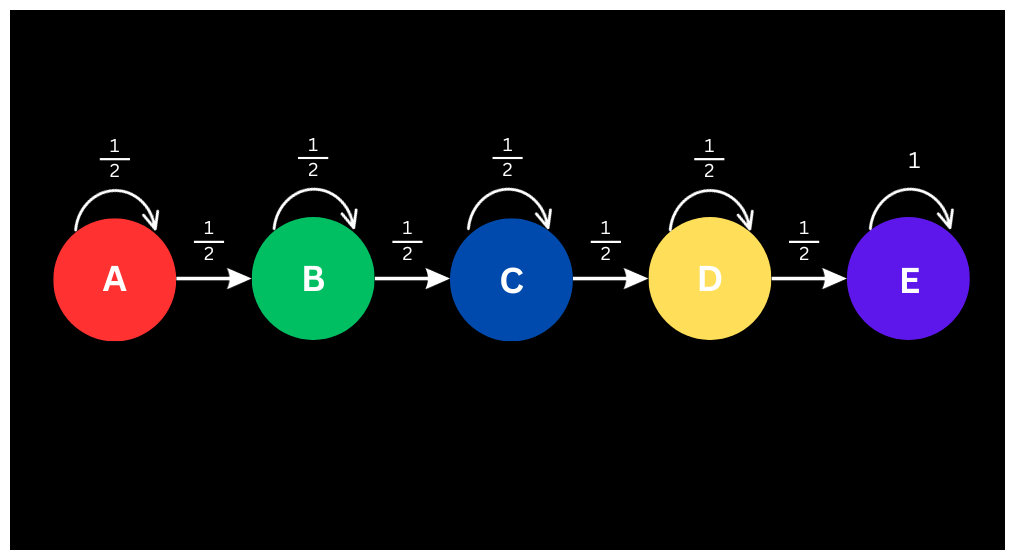

In [1]:
img = mpimg.imread('/content/1.png')

img_height, img_width, _ = img.shape

plt.figure(figsize = (img_width / 100, img_height / 100))
plt.imshow(img, interpolation = 'none')
plt.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0)
plt.axis('off')
plt.show()

## 2. Explicitly write the state transition matrix.



---



We can represent the Markov chain transition matrix as follows:


\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 \\
0 & \frac{1}{2} & \frac{1}{2} & 0 & 0 \\
0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 \\
0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} \\
0 & 0 & 0 & 0 & 1
\end{bmatrix}

Where each row represents the current state (house a person is in) and each column represents the next state (house they can move to or stay in).

## 3. (Try) to do the decomposition into eigenvalues and eigenvectors.



---



According to the following video...

https://www.youtube.com/watch?v=RIjL4s1iTjg

A matrix $A$ is diagonalizable if and only if there exists a matrix $P$ such that $P^{-1}AP = D$ is a diagonal matrix. This is equivalent to saying that the matrix $A$ can be represented completely in terms of its eigenvalues and eigenvectors.

For a matrix to be diagonalizable, it needs to have a complete set of linearly independent eigenvectors. In other words, for a matrix of $n \times n$, we need to find $n$ linearly independent eigenvectors in order to diagonalize it.

In [2]:
import numpy as np

A = np.array([
    [0.5, 0.5, 0, 0, 0],
    [0, 0.5, 0.5, 0, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0, 0.5, 0.5],
    [0, 0, 0, 0, 1]
])

eigenvalues, eigenvectors = np.linalg.eig(A)

The matrix has the following eigenvalues:

In [4]:
print(eigenvalues)

[0.5 0.5 0.5 0.5 1. ]


Which already gives us a bad indication, since it has repeated eigenvalues, and to find its vectors that are **own** and **linearly independent** we must be very cautious.

In [5]:
print(eigenvectors)

[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   4.47213595e-01]
 [ 0.00000000e+00  2.22044605e-16 -2.22044605e-16  2.22044605e-16
   4.47213595e-01]
 [ 0.00000000e+00  0.00000000e+00  4.93038066e-32 -4.93038066e-32
   4.47213595e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.09476443e-47
   4.47213595e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.47213595e-01]]


Now observing the different eigenvectors for each eigenvalue it is clear that for the different $\lambda_s$ they are not linearly independent of each other. This is evidenced by the presence of extremely small values (close to zero) and by the repetition of patterns in the eigenvectors.

**The combination of repeated eigenvalues and the lack of linearly independent eigenvectors means that we cannot diagonalize the transition matrix.**

### Example of a matrix that is diagonalizable.

---

In [6]:
A = np.array([
    [2, 1],
    [0, 3]
])

eigenvalues_A, eigenvectors_A = np.linalg.eig(A)

The eigenvalues of the matrix $A$ are:
$\lambda_1 = 2, \quad \lambda_2 = 3$



In [7]:
print(eigenvalues_A)

[2. 3.]


The eigenvectors associated with these eigenvalues are: \
For $\lambda_1 = 2$:
\begin{bmatrix}
1 \\
0 \\
\end{bmatrix}

For $\lambda_2 = 3$:

\begin{bmatrix}
0.70710678 \\
0.70710678 \\
\end{bmatrix}


In [8]:
print(eigenvectors_A)

[[1.         0.70710678]
 [0.         0.70710678]]


Since these two eigenvectors are linearly independent (that is, you cannot get one from the other by multiplication by a scalar), the matrix $A$ is diagonalizable.

Therefore, we could find a matrix $P$ composed of these eigenvectors as columns and a diagonal matrix $D$ containing the eigenvalues on the diagonal, so that $P^{-1}AP = D$.

In [10]:
# Matrix P formed by the eigenvectors
P = eigenvectors_A

# We calculate P^-1 * A * P
D = np.linalg.inv(P).dot(A).dot(P)

print(D)

[[2. 0.]
 [0. 3.]]


## 4. Numerically, raise the matrix to successive powers to see what happens when there are N instants in the chain.



---



In [11]:
P = np.array([
    [0.5, 0.5, 0, 0, 0],
    [0, 0.5, 0.5, 0, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0, 0.5, 0.5],
    [0, 0, 0, 0, 1]
])

In [12]:
N_values = range(1, 30)  # Number of steps we want the walker to take
rows = [[1, 0, 0, 0, 0]]  # List to store all the data in the following loop, IMPORTANT TO START WITH [1, 0, 0, 0, 0] MEANS STARTING AT HOUSE A.

for N in N_values:  # This is a for loop that iterates over each number in N_values (i.e., each number from 1 to 29). In each iteration of the loop, the current number is stored in the variable N.
    P_power = np.linalg.matrix_power(P, N)  # Here, the matrix P is being multiplied by itself N times.
    rows.append(P_power[0, :])  # P_power[0, :] selects the first row of the matrix and all its columns.

In [13]:
print(rows)

[[1, 0, 0, 0, 0], array([0.5, 0.5, 0. , 0. , 0. ]), array([0.25, 0.5 , 0.25, 0.  , 0.  ]), array([0.125, 0.375, 0.375, 0.125, 0.   ]), array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625]), array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.1875 ]), array([0.015625, 0.09375 , 0.234375, 0.3125  , 0.34375 ]), array([0.0078125, 0.0546875, 0.1640625, 0.2734375, 0.5      ]), array([0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.63671875]), array([0.00195312, 0.01757812, 0.0703125 , 0.1640625 , 0.74609375]), array([0.00097656, 0.00976562, 0.04394531, 0.1171875 , 0.828125  ]), array([4.88281250e-04, 5.37109375e-03, 2.68554688e-02, 8.05664062e-02,
       8.86718750e-01]), array([2.44140625e-04, 2.92968750e-03, 1.61132812e-02, 5.37109375e-02,
       9.27001953e-01]), array([1.22070312e-04, 1.58691406e-03, 9.52148438e-03, 3.49121094e-02,
       9.53857422e-01]), array([6.10351562e-05, 8.54492188e-04, 5.55419922e-03, 2.22167969e-02,
       9.71313477e-01]), array([3.05175781e-05, 4.57763672e-04, 3.2043457

## 5. With the matrices obtained, calculate the distributions in different iterations.



---



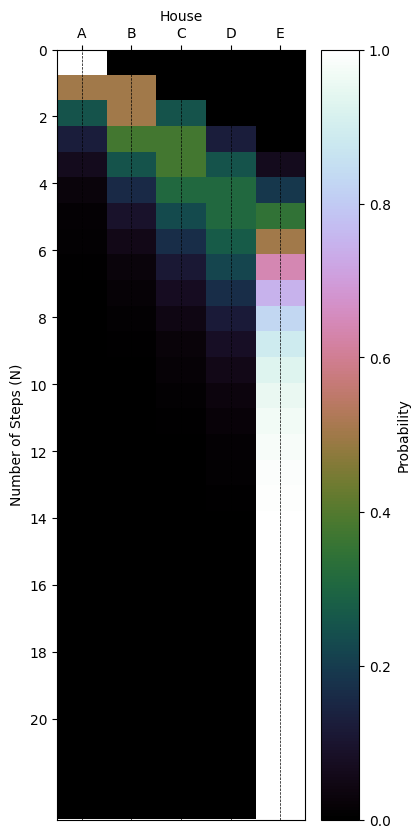

In [14]:
plt.figure(figsize = (4, 10))
plt.imshow(rows, cmap = "cubehelix", aspect = 'auto', interpolation = 'none', extent = [0.5, 5.5, 23, 0])
plt.colorbar(label = 'Probability')
plt.xlabel('House')
plt.ylabel('Number of Steps (N)')
plt.xticks(ticks = [1, 2, 3, 4, 5], labels = ['A', 'B', 'C', 'D', 'E'])

# Move the X-axis to the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# Adjust the Y-axis to go from 0 to 20 from top to bottom
plt.yticks(ticks = range(0, 21, 2))

plt.grid(True, which = 'both', axis = 'x', linestyle = '--', linewidth = 0.5, color = 'k')
plt.show()

## 6. Simulate $K = 100,000$ individuals leaving house A.



---



In [15]:
def simulate_individual(P, max_iterations = 100):
    state = 0 # Initially, the individual is in house A
    for _ in range(max_iterations):
        # State transition
        state = np.random.choice(len(P[state]), p = P[state])
        # If the individual reaches house E, the simulation ends
        if state == len(P) - 1:
            break
    return state

In [16]:
P = np.array([
    [0.5, 0.5, 0, 0, 0],
    [0, 0.5, 0.5, 0, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0, 0.5, 0.5],
    [0, 0, 0, 0, 1]
])

K = 100000  # Number of walkers
final_states = [simulate_individual(P) for _ in range(K)]

# We count how many walkers ended up in each state
state_counts = {i + 1 : final_states.count(i) for i in range(len(P))}

print(state_counts)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 100000}


## 7. Draw some 'sample paths' with respect to time (not too many so that your figure is clear.)


---



In [17]:
# Simulation of 50 sample roads
num_individuals = 50
max_steps = 20

paths_50 = []

for i in range(num_individuals):
    state = 0  # Initially, the individual is in house A
    path = [state]

    for i in range(max_steps):
        # State transition
        state = np.random.choice(len(P[state]), p = P[state])
        path.append(state)

        # If the individual arrives at house E, he will always stay there
        if state == len(P) - 1:
            path.extend([state] * (max_steps - len(path) + 1))
            break

    paths_50.append(path)

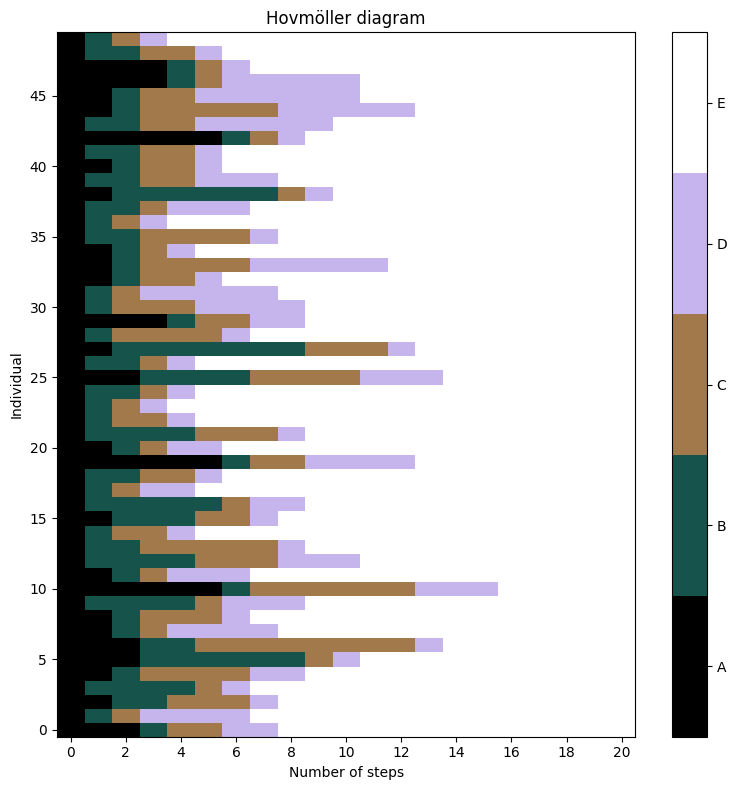

In [19]:
fig, ax = plt.subplots(figsize = (8, 8))
cax = ax.imshow(paths_50, aspect = 'auto', cmap = 'cubehelix', origin = 'lower')

ax.set_xlabel('Number of steps')
ax.set_ylabel('Individual')
ax.set_yticks(np.arange(0, 50, 5))
ax.set_xticks(np.arange(0, 21, 2))
ax.set_xticklabels(np.arange(0, 21, 2))
ax.set_title('Hovmöller diagram')

cbar = fig.colorbar(cax, ticks = [0, 1, 2, 3, 4], orientation = 'vertical', boundaries = np.arange(-0.5,5.5,1), values = np.arange(0,5,1))
cbar.ax.set_yticklabels(['A', 'B', 'C', 'D', 'E'])

plt.tight_layout()
plt.show()

## 8. For successive steps, use the sampling paths to empirically calculate the distributions. Compare them with the theoretical ones.



---



In [20]:
steps = 20
all_states = []

for i in range(K):
    state = 0
    states = [state]

    for i in range(steps):
        state = np.random.choice(len(P[state]), p = P[state])
        states.append(state)

    all_states.append(states)

In [21]:
# Empirical Distribution

empirical_dists = []

for step in range(steps + 1):
    step_states = [ind[step] for ind in all_states]
    distribution = [step_states.count(i) / K for i in range(len(P))]
    empirical_dists.append(distribution)

In [22]:
# Theoretical Distribution

distribution = np.array([1, 0, 0, 0, 0])
theoretical_distributions = [distribution]

for i in range(steps):
    distribution = np.dot(distribution, P)
    theoretical_distributions.append(distribution)

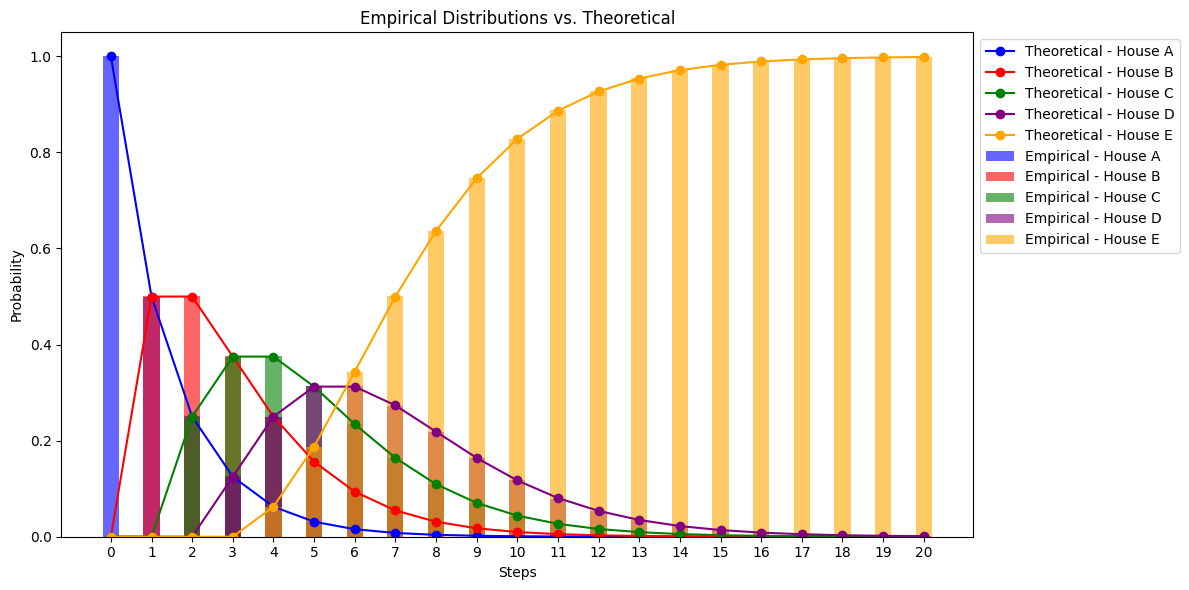

In [25]:
colors = ['blue', 'red', 'green', 'purple', 'orange']
houses = ['A', 'B', 'C', 'D', 'E']
width = 0.4

fig, ax = plt.subplots(figsize = (12, 6))

positions = np.arange(steps + 1)

for idx, (color, house) in enumerate(zip(colors, houses)):

    empirical = [emp_dist[idx] for emp_dist in empirical_dists]
    theoretical = [theo_dist[idx] for theo_dist in theoretical_distributions]

    # We graph the empirical distribution with bars
    ax.bar(positions, empirical, width, color = color, label = f'Empirical - House {house}', alpha = 0.6)

    # We graph the theoretical distribution with a line of the same color as the bar
    ax.plot(positions, theoretical, color = color, marker = 'o', label = f'Theoretical - House {house}')

ax.set_xlabel('Steps')
ax.set_ylabel('Probability')
ax.set_title('Empirical Distributions vs. Theoretical')
ax.set_xticks(positions)
ax.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

## 9. For each simulation, count in which step the individual arrives at house E (Absorption). Draw the probability mass function of this variable.


---



In [26]:
K = 100000
max_iterations = 100
steps_to_reach_E = []

for _ in range(K):
    state = 0
    for step in range(max_iterations):
        state = np.random.choice(len(P[state]), p = P[state])
        if state == len(P) - 1:
            steps_to_reach_E.append(step + 1)
            break
    else:
        steps_to_reach_E.append(max_iterations)

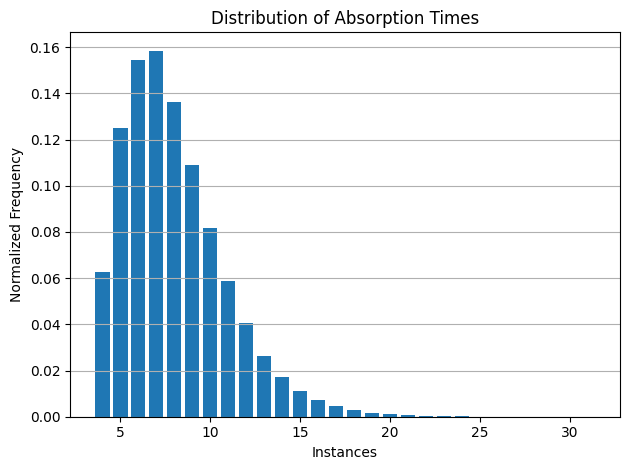

In [27]:
steps_counts = {}

for step in set(steps_to_reach_E):
    steps_counts[step] = steps_to_reach_E.count(step)

plt.bar(steps_counts.keys(), [count/K for count in steps_counts.values()], width = 0.8)
plt.xlabel('Instances')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Absorption Times')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

# **10. Repeat the previous steps only now the probability of staying is 4/5, and the probability of moving to the right is 1/5.**


---



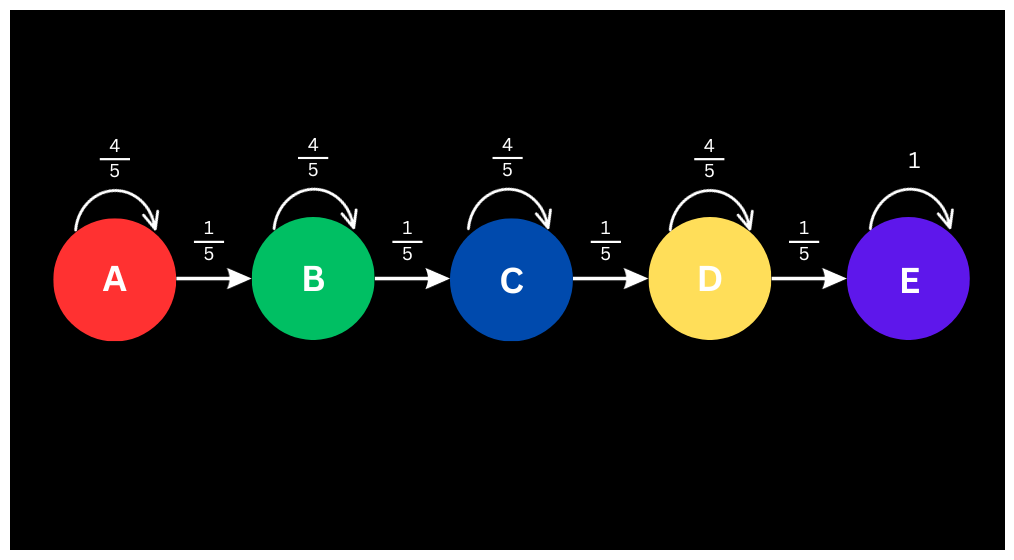

In [37]:
# STEP 1

img = mpimg.imread('/content/2.png')

img_height, img_width, _ = img.shape

plt.figure(figsize = (img_width / 100, img_height / 100))
plt.imshow(img, interpolation = 'none')
plt.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0)
plt.axis('off')
plt.show()

In [29]:
# STEP 2

P = np.array([
    [4/5, 1/5, 0, 0, 0],
    [0, 4/5, 1/5, 0, 0],
    [0, 0, 4/5, 1/5, 0],
    [0, 0, 0, 4/5, 1/5],
    [0, 0, 0, 0, 1]
])

print(P)

[[0.8 0.2 0.  0.  0. ]
 [0.  0.8 0.2 0.  0. ]
 [0.  0.  0.8 0.2 0. ]
 [0.  0.  0.  0.8 0.2]
 [0.  0.  0.  0.  1. ]]


In [30]:
# STEP 3

eigenvalues, eigenvectors = np.linalg.eig(P)

print(eigenvalues)

[0.8 0.8 0.8 0.8 1. ]


In [31]:
print(eigenvectors)

[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   4.47213595e-01]
 [ 0.00000000e+00  8.88178420e-16 -8.88178420e-16  8.88178420e-16
   4.47213595e-01]
 [ 0.00000000e+00  0.00000000e+00  7.88860905e-31 -7.88860905e-31
   4.47213595e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.00649232e-46
   4.47213595e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.47213595e-01]]


IT IS NOT DIAGONALIZABLE.

In [32]:
# STEP 4

N_values = range(1, 40)  # Number of steps we want the walker to take
rows = [[1, 0, 0, 0, 0]]  # List to store all the data in the following loop, STARTING WITH [1, 0, 0, 0, 0] MEANS STARTING AT HOUSE A.

for N in N_values:  # This is a for loop that iterates over each number in N_values (i.e., each number from 1 to 39). In each iteration of the loop, the current number is stored in the variable N.
    P_power = np.linalg.matrix_power(P, N)  # Here, the matrix P is being multiplied by itself N times.
    rows.append(P_power[0, :])  # P_power[0, :] selects the first row of the matrix and all its columns.

print(rows)

[[1, 0, 0, 0, 0], array([0.8, 0.2, 0. , 0. , 0. ]), array([0.64, 0.32, 0.04, 0.  , 0.  ]), array([0.512, 0.384, 0.096, 0.008, 0.   ]), array([0.4096, 0.4096, 0.1536, 0.0256, 0.0016]), array([0.32768, 0.4096 , 0.2048 , 0.0512 , 0.00672]), array([0.262144, 0.393216, 0.24576 , 0.08192 , 0.01696 ]), array([0.2097152, 0.3670016, 0.2752512, 0.114688 , 0.033344 ]), array([0.16777216, 0.33554432, 0.29360128, 0.14680064, 0.0562816 ]), array([0.13421773, 0.30198989, 0.30198989, 0.17616077, 0.08564173]), array([0.10737418, 0.26843546, 0.30198989, 0.20132659, 0.12087388]), array([0.08589935, 0.2362232 , 0.295279  , 0.22145925, 0.1611392 ]), array([0.06871948, 0.20615843, 0.28346784, 0.2362232 , 0.20543105]), array([0.05497558, 0.17867064, 0.26800596, 0.24567213, 0.25267569]), array([0.04398047, 0.15393163, 0.2501389 , 0.2501389 , 0.30181012]), array([0.03518437, 0.1319414 , 0.23089744, 0.2501389 , 0.3518379 ]), array([0.0281475 , 0.11258999, 0.21110623, 0.2462906 , 0.40186567]), array([0.022518  ,

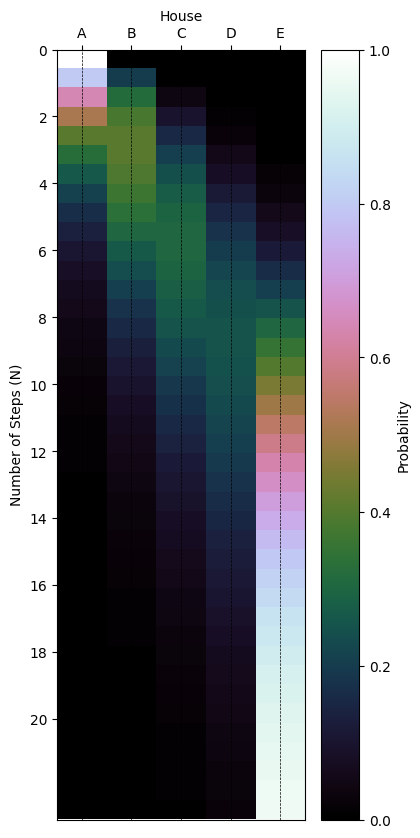

In [33]:
# STEP 5

plt.figure(figsize = (4, 10))
plt.imshow(rows, cmap = "cubehelix", aspect = 'auto', interpolation = 'none', extent = [0.5, 5.5, 23, 0])
plt.colorbar(label = 'Probability')
plt.xlabel('House')
plt.ylabel('Number of Steps (N)')
plt.xticks(ticks = [1, 2, 3, 4, 5], labels = ['A', 'B', 'C', 'D', 'E'])
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.yticks(ticks = range(0, 21, 2))
plt.grid(True, which = 'both', axis = 'x', linestyle = '--', linewidth = 0.5, color = 'k')
plt.show()

In [34]:
# STEP 6

def simulate_individual(P, max_iterations = 100):
    state = 0 # Initially, the individual is in house A
    for _ in range(max_iterations):
        # State transition
        state = np.random.choice(len(P[state]), p = P[state])
        # If the individual reaches house E, the simulation ends
        if state == len(P) - 1:
            break
    return state

P = np.array([
    [4/5, 1/5, 0, 0, 0],
    [0, 4/5, 1/5, 0, 0],
    [0, 0, 4/5, 1/5, 0],
    [0, 0, 0, 4/5, 1/5],
    [0, 0, 0, 0, 1]
])

K = 100000  # Number of walkers
final_states = [simulate_individual(P) for _ in range(K)]

# We count how many walkers ended up in each state
state_counts = {i + 1 : final_states.count(i) for i in range(len(P))}

print(state_counts)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 100000}


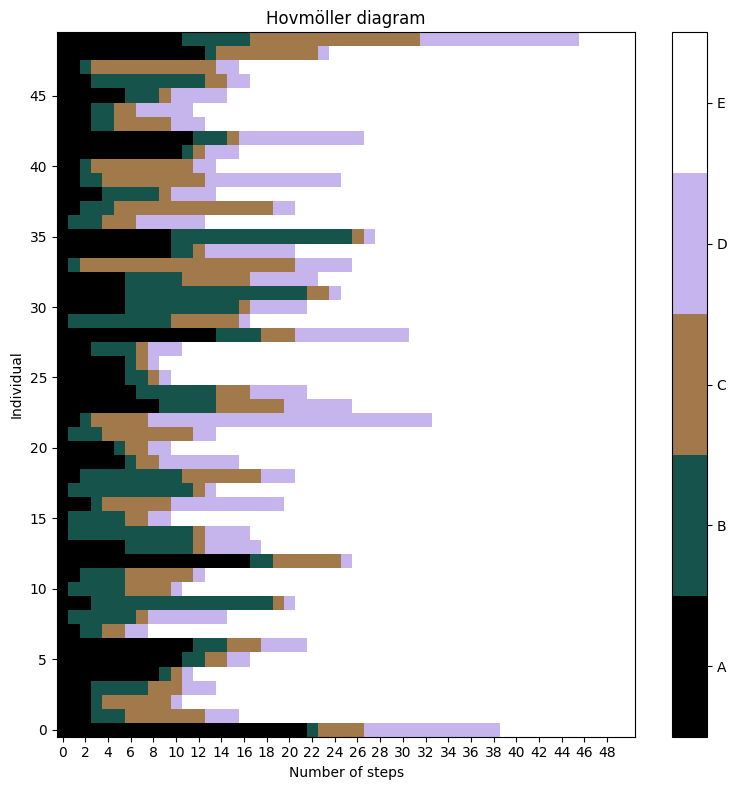

In [35]:
# STEP 7

# Simulation of 50 sample roads
num_individuals = 50
max_steps = 50

paths_50 = []

for i in range(num_individuals):
    state = 0  # Initially, the individual is in house A
    path = [state]

    for i in range(max_steps):
        # State transition
        state = np.random.choice(len(P[state]), p=P[state])
        path.append(state)

        # If the individual arrives at house E, he will always stay there
        if state == len(P) - 1:
            path.extend([state] * (max_steps - len(path) + 1))
            break

    paths_50.append(path)

fig, ax = plt.subplots(figsize = (8, 8))
cax = ax.imshow(paths_50, aspect = 'auto', cmap = 'cubehelix', origin = 'lower')

ax.set_xlabel('Number of steps')
ax.set_ylabel('Individual')
ax.set_yticks(np.arange(0, 50, 5))
ax.set_xticks(np.arange(0, 50, 2))
ax.set_xticklabels(np.arange(0, 50, 2))
ax.set_title('Hovmöller diagram')

cbar = fig.colorbar(cax, ticks = [0, 1, 2, 3, 4], orientation = 'vertical', boundaries = np.arange(-0.5,5.5,1), values = np.arange(0,5,1))
cbar.ax.set_yticklabels(['A', 'B', 'C', 'D', 'E'])

plt.tight_layout()
plt.show()

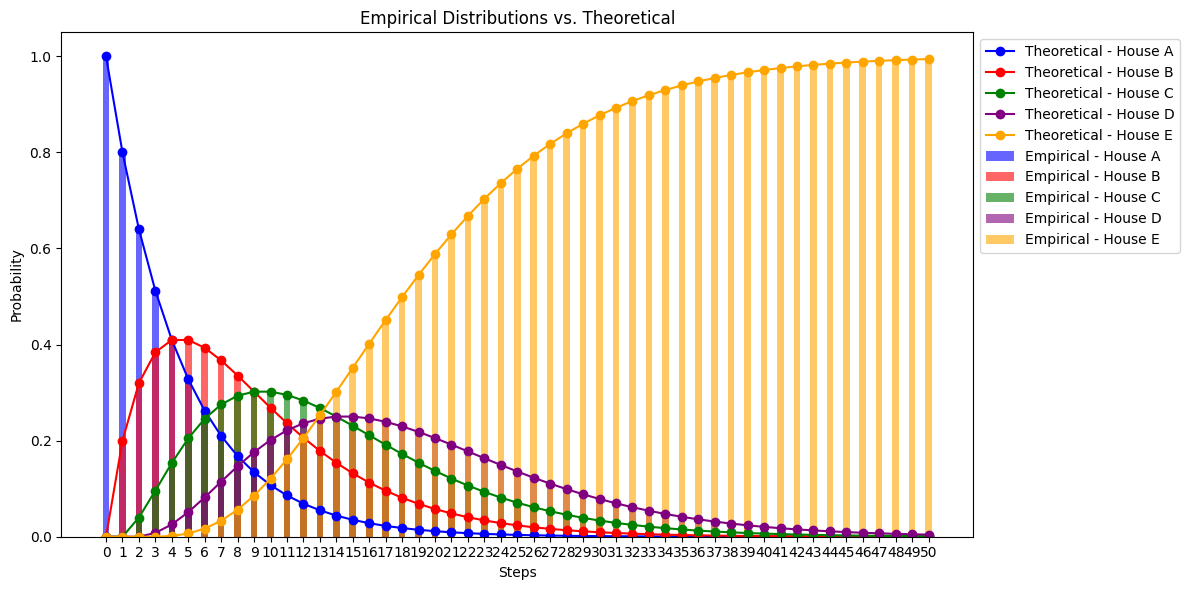

In [37]:
# STEP 8

steps = 50
all_states = []

for i in range(K):
    state = 0
    states = [state]

    for i in range(steps):
        state = np.random.choice(len(P[state]), p = P[state])
        states.append(state)

    all_states.append(states)

# Empirical Distribution

empirical_dists = []

for step in range(steps + 1):
    step_states = [ind[step] for ind in all_states]
    distribution = [step_states.count(i) / K for i in range(len(P))]
    empirical_dists.append(distribution)

# Theoretical Distribution

distribution = np.array([1, 0, 0, 0, 0])
theoretical_distributions = [distribution]

for i in range(steps):
    distribution = np.dot(distribution, P)
    theoretical_distributions.append(distribution)

colors = ['blue', 'red', 'green', 'purple', 'orange']
houses = ['A', 'B', 'C', 'D', 'E']
width = 0.4

fig, ax = plt.subplots(figsize = (12, 6))

positions = np.arange(steps + 1)

for idx, (color, house) in enumerate(zip(colors, houses)):

    empirical = [emp_dist[idx] for emp_dist in empirical_dists]
    theoretical = [theo_dist[idx] for theo_dist in theoretical_distributions]

    # We graph the empirical distribution with bars
    ax.bar(positions, empirical, width, color = color, label = f'Empirical - House {house}', alpha = 0.6)

    # We graph the theoretical distribution with a line of the same color as the bar
    ax.plot(positions, theoretical, color = color, marker = 'o', label = f'Theoretical - House {house}')

ax.set_xlabel('Steps')
ax.set_ylabel('Probability')
ax.set_title('Empirical Distributions vs. Theoretical')
ax.set_xticks(positions)
ax.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

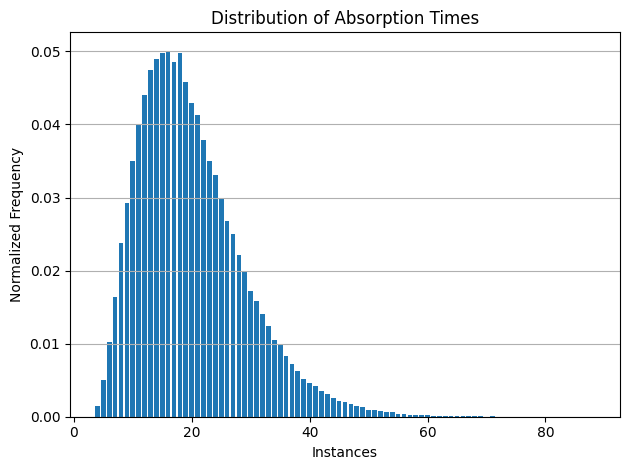

In [38]:
# STEP 9

K = 100000
max_iterations = 100

steps_to_reach_E = []
for _ in range(K):
    state = 0
    for step in range(max_iterations):
        state = np.random.choice(len(P[state]), p = P[state])
        if state == len(P) - 1:
            steps_to_reach_E.append(step + 1)
            break
    else:
        steps_to_reach_E.append(max_iterations)

steps_counts = {}

for step in set(steps_to_reach_E):
    steps_counts[step] = steps_to_reach_E.count(step)

plt.bar(steps_counts.keys(), [count/K for count in steps_counts.values()], width = 0.8)
plt.xlabel('Instances')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Absorption Times')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()